In [1]:
from marubatsu import Marubatsu

def calc_legal_moves(self):
    if self.status != Marubatsu.PLAYING:
        return []
    legal_moves = [(x, y) for y in range(self.BOARD_SIZE) 
                        for x in range(self.BOARD_SIZE)
                        if self.board[x][y] == Marubatsu.EMPTY]
    return legal_moves

Marubatsu.calc_legal_moves = calc_legal_moves

In [2]:
from tree import Mbtree, Node
from copy import deepcopy

def create_tree_by_df(self, N):
    legal_moves = N.mb.calc_legal_moves()
    for x, y in legal_moves:
        mb = deepcopy(N.mb)
        mb.move(x, y)
        node = Node(mb, parent=N, depth=N.depth + 1)
        N.insert(node)
        self.nodelist.append(node)
        self.nodelist_by_depth[node.depth].append(node)
        self.nodenum += 1
        self.create_tree_by_df(node)

Mbtree.create_tree_by_df = create_tree_by_df

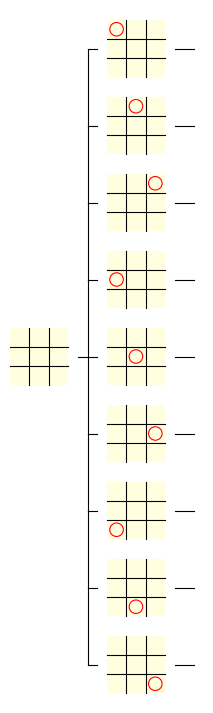

In [3]:
mbtree = Mbtree(algo="df")
mbtree.draw_subtree(mbtree.root, maxdepth=1)

In [4]:
from util import Check_solved

@staticmethod
def is_weakly_solved(node, ai, turn, params=None):
    if params is None:
        params = {}
    if node.mb.status == turn or node.mb.status == Marubatsu.DRAW:
        return True
    elif node.mb.status != Marubatsu.PLAYING:
        return False
        
    if turn == node.mb.turn:
        moves = ai(node.mb, candidate=True, **params) 
    else:
        moves = node.mb.calc_legal_moves()
    retval = True
    for move in moves:
        childnode = node.children_by_move[move]
        retval = Check_solved.is_weakly_solved(childnode, ai, turn, params) and retval
    return retval

Check_solved.is_weakly_solved = is_weakly_solved  

In [5]:
from ai import ai2s, ai14s, ai_gt6

print(Check_solved.is_weakly_solved(mbtree.root, ai2s, Marubatsu.CIRCLE))
print(Check_solved.is_weakly_solved(mbtree.root, ai2s, Marubatsu.CROSS))

False
False


In [6]:
print(Check_solved.is_weakly_solved(mbtree.root, ai14s, Marubatsu.CIRCLE))
print(Check_solved.is_weakly_solved(mbtree.root, ai14s, Marubatsu.CROSS))

True
True


In [7]:
from util import load_bestmoves

bestmoves = load_bestmoves("../data/bestmoves_by_board.dat")
params = {"bestmoves_by_board": bestmoves}
print(Check_solved.is_weakly_solved(mbtree.root, ai_gt6, Marubatsu.CIRCLE, params))
print(Check_solved.is_weakly_solved(mbtree.root, ai_gt6, Marubatsu.CROSS, params))

True
True


In [8]:
@staticmethod
def is_weakly_solved_r(node, ai, turn, params):
    if node.mb.status == turn or node.mb.status == Marubatsu.DRAW:
        return True
    elif node.mb.status != Marubatsu.PLAYING:
        return False
        
    if turn == node.mb.turn:
        moves = ai(node.mb, candidate=True, **params) 
    else:
        moves = node.mb.calc_legal_moves()
    retval = True
    for move in moves:
        childnode = node.children_by_move[move]
        retval = Check_solved.is_weakly_solved_r(childnode, ai, turn, params) and retval
    return retval

Check_solved.is_weakly_solved_r = is_weakly_solved_r  

In [9]:
@staticmethod
def is_weakly_solved(ai, params=None, verbose=True):
    if params is None:
        params = {}
    mbtree = Mbtree.load("../data/aidata")
    root = mbtree.root
    circle_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CIRCLE, params)
    cross_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CROSS, params)
    result = circle_result and cross_result
    if verbose:
        print("   o", circle_result)
        print("   x", cross_result)
        print("Both", result)
    return result

Check_solved.is_weakly_solved = is_weakly_solved

In [10]:
print(Check_solved.is_weakly_solved(ai2s))

   o False
   x False
Both False
False


In [11]:
@staticmethod
def is_weakly_solved(ai, params=None, verbose=True):
    if params is None:
        params = {}
    if Check_solved.mbtree is None:
        Check_solved.mbtree = Mbtree.load("../data/aidata")
    root = Check_solved.mbtree.root
    circle_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CIRCLE, params)
    cross_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CROSS, params)
    result = circle_result and cross_result
    if verbose:
        print("   o", circle_result)
        print("   x", cross_result)
        print("Both", result)
    return result

Check_solved.is_weakly_solved = is_weakly_solved

In [12]:
Check_solved.mbtree = None

1 回目の is_weakly_solved の処理は時間がかかる

In [13]:
print(Check_solved.is_weakly_solved(ai2s))

   o False
   x False
Both False
False


2 回目以降の is_weakly_solved の処理は半分くらいの時間で終了する

In [14]:
print(Check_solved.is_weakly_solved(ai2s))

   o False
   x False
Both False
False


In [15]:
print(Check_solved.is_weakly_solved(ai14s))
print(Check_solved.is_weakly_solved(ai_gt6, params))

   o True
   x True
Both True
True
   o True
   x True
Both True
True


In [16]:
%%timeit
Check_solved.is_weakly_solved(ai2s, verbose=False)

28.7 s ± 85.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
Check_solved.is_weakly_solved(ai14s, verbose=False)

306 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
Check_solved.is_weakly_solved(ai_gt6, params, verbose=False)

179 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
@staticmethod
def is_weakly_solved(ai, params=None, verbose=True):
    Check_solved.count = 0
    if params is None:
        params = {}
    if Check_solved.mbtree is None:
        Check_solved.mbtree = Mbtree.load("../data/aidata")
    root = Check_solved.mbtree.root
    circle_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CIRCLE, params)
    cross_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CROSS, params)
    result = circle_result and cross_result
    if verbose:
        print("   o", circle_result)
        print("   x", cross_result)
        print("Both", result)
    return result

Check_solved.is_weakly_solved = is_weakly_solved

In [21]:
@staticmethod
def is_weakly_solved_r(node, ai, turn, params):
    Check_solved.count += 1
    if node.mb.status == turn or node.mb.status == Marubatsu.DRAW:
        return True
    elif node.mb.status != Marubatsu.PLAYING:
        return False
        
    if turn == node.mb.turn:
        moves = ai(node.mb, candidate=True, **params) 
    else:
        moves = node.mb.calc_legal_moves()
    retval = True
    for move in moves:
        childnode = node.children_by_move[move]
        retval = Check_solved.is_weakly_solved_r(childnode, ai, turn, params) and retval
    return retval

Check_solved.is_weakly_solved_r = is_weakly_solved_r  

In [22]:
Check_solved.is_weakly_solved(ai2s)
print(Check_solved.count)

   o False
   x False
Both False
1099892


In [23]:
Check_solved.is_weakly_solved(ai14s)
print(Check_solved.count)

   o True
   x True
Both True
3244


In [24]:
Check_solved.is_weakly_solved(ai_gt6, params)
print(Check_solved.count)

   o True
   x True
Both True
92128


In [25]:
@staticmethod
def is_weakly_solved_r(node, ai, turn, params):
    Check_solved.count += 1
    if node.mb.status == turn or node.mb.status == Marubatsu.DRAW:
        return True
    elif node.mb.status != Marubatsu.PLAYING:
        return False
        
    if turn == node.mb.turn:
        moves = ai(node.mb, candidate=True, **params) 
    else:
        moves = node.mb.calc_legal_moves()
    for move in moves:
        childnode = node.children_by_move[move]
        if not Check_solved.is_weakly_solved_r(childnode, ai, turn, params):
            return False
    return True

Check_solved.is_weakly_solved_r = is_weakly_solved_r  

In [27]:
Check_solved.is_weakly_solved(ai2s)
print(Check_solved.count)
Check_solved.is_weakly_solved(ai14s)
print(Check_solved.count)
Check_solved.is_weakly_solved(ai_gt6, params)
print(Check_solved.count)

   o False
   x False
Both False
58
   o True
   x True
Both True
3244
   o True
   x True
Both True
92128


In [28]:
%%timeit
Check_solved.is_weakly_solved(ai2s, verbose=False)

3.15 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%%timeit
Check_solved.is_weakly_solved(ai14s, verbose=False)

305 ms ± 5.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
Check_solved.is_weakly_solved(ai_gt6, params, verbose=False)

191 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
@staticmethod
def is_weakly_solved_r(node, ai, turn, params, registered_boards):
    txt = node.mb.board_to_str()
    if txt in registered_boards:
        return True
    Check_solved.count += 1
    registered_boards.add(txt)
    if node.mb.status == turn or node.mb.status == Marubatsu.DRAW:
        return True
    elif node.mb.status != Marubatsu.PLAYING:
        return False
        
    if turn == node.mb.turn:
        moves = ai(node.mb, candidate=True, **params) 
    else:
        moves = node.mb.calc_legal_moves()
    for move in moves:
        childnode = node.children_by_move[move]
        if not Check_solved.is_weakly_solved_r(childnode, ai, turn, params, registered_boards):
            return False
    return True

Check_solved.is_weakly_solved_r = is_weakly_solved_r

In [32]:
@staticmethod
def is_weakly_solved(ai, params=None, verbose=True):
    Check_solved.count = 0
    if params is None:
        params = {}
    if Check_solved.mbtree is None:
        Check_solved.mbtree = Mbtree.load("../data/aidata")
    root = Check_solved.mbtree.root
    circle_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CIRCLE, params, set())
    cross_result = Check_solved.is_weakly_solved_r(root, ai, Marubatsu.CROSS, params, set())
    result = circle_result and cross_result
    if verbose:
        print("   o", circle_result)
        print("   x", cross_result)
        print("Both", result)
    return result

Check_solved.is_weakly_solved = is_weakly_solved

In [33]:
Check_solved.is_weakly_solved(ai2s)
print(Check_solved.count)
Check_solved.is_weakly_solved(ai14s)
print(Check_solved.count)
Check_solved.is_weakly_solved(ai_gt6, params)
print(Check_solved.count)

   o False
   x False
Both False
45
   o True
   x True
Both True
1366
   o True
   x True
Both True
5700


In [34]:
%%timeit
Check_solved.is_weakly_solved(ai2s, verbose=False)

2.83 ms ± 9.52 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit
Check_solved.is_weakly_solved(ai14s, verbose=False)

178 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
Check_solved.is_weakly_solved(ai_gt6, params, verbose=False)

35.3 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
from tqdm import tqdm
from util import load_bestmoves, load_mblist

@staticmethod
def is_strongly_solved(ai, params=None, consider_samedata=True):
    if Check_solved.bestmoves_by_board is None:
        Check_solved.bestmoves_by_board = load_bestmoves ("../data/bestmoves_by_board.dat")
    if consider_samedata:
        if Check_solved.mblist_by_board_min is None:
            Check_solved.mblist_by_board_min = load_mblist("../data/mblist_by_board_min.dat")
        mblist = Check_solved.mblist_by_board_min
    else:
        if Check_solved.mblist_by_board2 is None:
            Check_solved.mblist_by_board2 = load_mblist("../data/mblist_by_board2.dat") 
        mblist = Check_solved.mblist_by_board2        
    if params is None:
        params = {}
    count = 0
    incorrectlist = []
    for mb in tqdm(mblist):
        candidate = set(ai(mb, candidate=True, **params))
        bestmoves = set(Check_solved.bestmoves_by_board[mb.board_to_str()])
        if candidate <= bestmoves:
            count += 1
        else:
            incorrectlist.append((mb, candidate, bestmoves))
    nodenum = len(mblist)
    print(f"{count}/{nodenum} {count/nodenum*100:.2f}%")
    return count == nodenum, incorrectlist

Check_solved.is_strongly_solved = is_strongly_solved

In [39]:
Check_solved.mblist_by_board_min = None
Check_solved.mblist_by_board2 = None
result, incorrectlist = Check_solved.is_strongly_solved(ai14s)
print(result)

100%|██████████| 431/431 [00:00<00:00, 2191.99it/s]

424/431 98.38%
False


In [40]:
result, incorrectlist = Check_solved.is_strongly_solved(ai14s, consider_samedata=False)
print(result)


100%|██████████| 3191/3191 [00:01<00:00, 2895.01it/s]

3139/3191 98.37%
False
